# Seaborn Tutorial with tips dataset
## Scatter Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

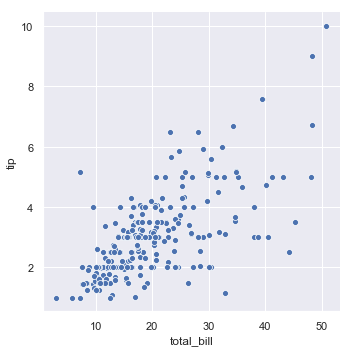

In [3]:
tips = sns.load_dataset("tips")
# Both variables are numeric, data is the dataset set above
sns.relplot(x="total_bill", y="tip", data=tips);

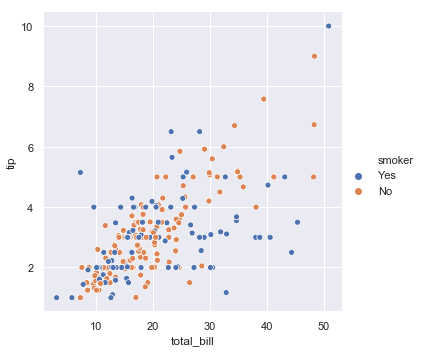

In [4]:
# hue colours by yes or no to smoker
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

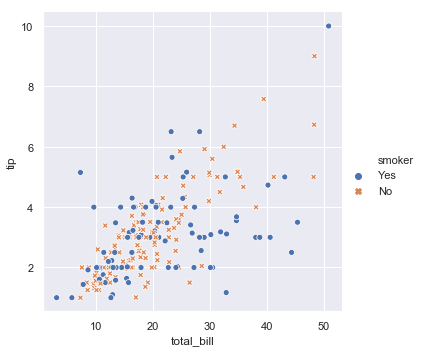

In [5]:
# style is adding different markers
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

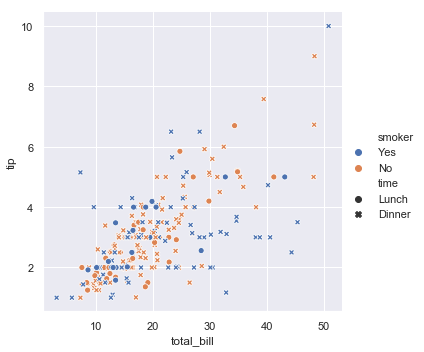

In [6]:
# style changes based on time instead of smoker as above...looks cluttered
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

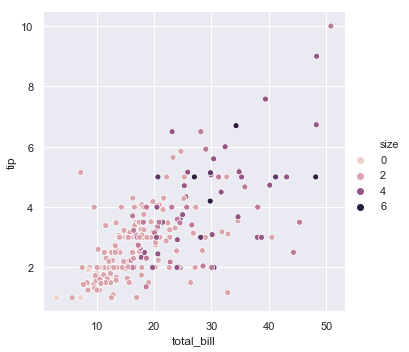

In [7]:
# Changed colours as hue is set by party size which is numeric in this case
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

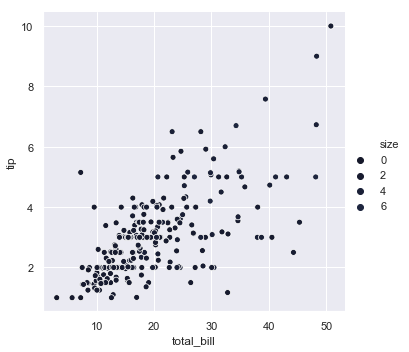

In [8]:
# alters the palette using the cubehelix_palette() (seems to be ._ values...read up on this later!)
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.3,l=.1", data=tips);

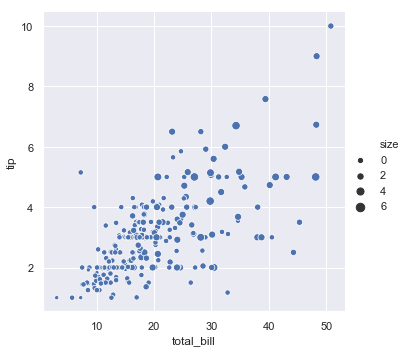

In [9]:
# size can also map to size variable from dataset
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

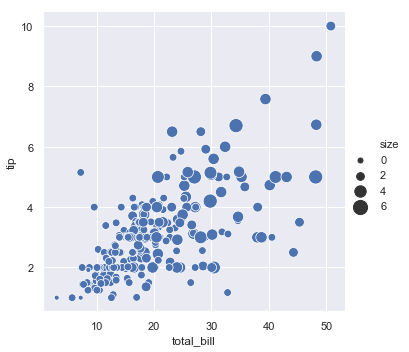

In [10]:
# sizes alters the default range of values
sns.relplot(x="total_bill", y="tip", size="size", sizes=(25, 200), data=tips);

scatterplot() API for more https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

## Line Plots

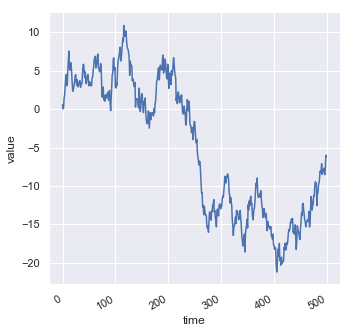

In [11]:
# creating df with random numbers. 
# cumsum() is the cumulative sum of array elements over a given axix eg [1, 2, 3, 4] = [1, 3, 6, 10]
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
# generate the graph
g.fig.autofmt_xdate()

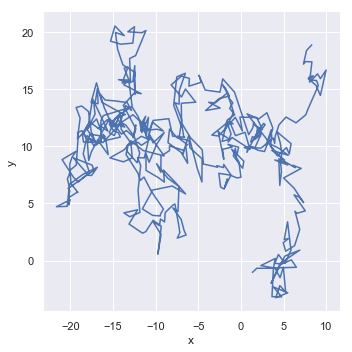

In [12]:
# by default sorts values by the x-axis but this will disable that behaviour
# linepoint assumes you are trying to draw y as a function of x
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

## Aggregration and Representing Uncertainity

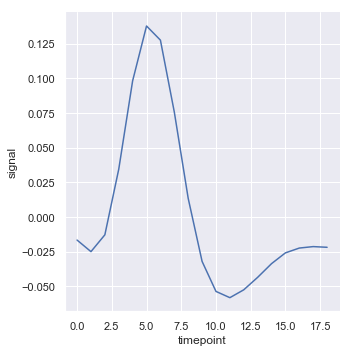

In [18]:
#fmri.head() and .describe() to look at dataset
# this dataset has multiple measurement for the saame value x
fmri = sns.load_dataset("fmri")
# default behaviour aggregrates the multiple measurements at each x value 
#by plotting the mean and the 95% confidence interval around the mean
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);
# adding ci=None turns this off

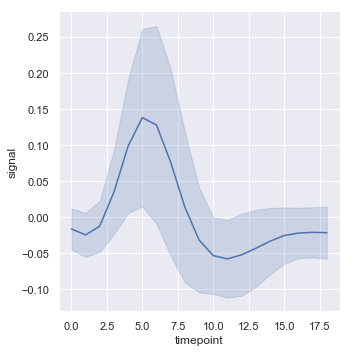

In [19]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);
#plots against standard deviation...useful for larger datasets

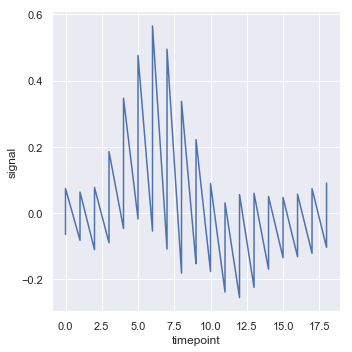

In [20]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);
# turns off aggregration altogether...can give strange results